In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
#Read in the Dataset
insurance_df = pd.read_csv('Medical_insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
#Check for Null Values
insurance_df.loc[pd.isna(insurance_df).any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


In [4]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

#Convert Categorical Values into Numerical Values
label_encoder_1 = LabelEncoder()
label_encoder_1.fit(insurance_df['sex'])
insurance_df['sex_encoded'] = label_encoder_1.transform(insurance_df['sex'])

label_encoder_2 = LabelEncoder()
label_encoder_2.fit(insurance_df['smoker'])
insurance_df['smoker_encoded'] = label_encoder_2.transform(insurance_df['smoker'])

label_encoder_3 = LabelEncoder()
label_encoder_3.fit(insurance_df['region'])
insurance_df['region_encoded'] = label_encoder_3.transform(insurance_df['region'])

insurance_df

C:\Users\bjros\Anaconda3\Lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,0,0,2
2768,21,female,34.600,0,no,southwest,2020.17700,0,0,3
2769,19,male,26.030,1,yes,northwest,16450.89470,1,1,1
2770,23,male,18.715,0,no,northwest,21595.38229,1,0,1


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(insurance_df[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded']], insurance_df['charges'], train_size=0.7, test_size=0.3, random_state=42)

In [6]:
X_train

,age,sex_encoded,bmi,children,smoker_encoded,region_encoded
1684,31,1,34.390,3,1,1
862,55,0,33.535,2,0,1
1992,27,0,25.175,0,0,0
889,57,1,33.630,1,0,1
1362,41,1,34.210,1,0,2
...,...,...,...,...,...,...
1638,54,1,34.210,2,1,2
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0


In [7]:
X_test

,age,sex_encoded,bmi,children,smoker_encoded,region_encoded
1106,49,0,29.925,0,0,1
1321,62,1,26.695,0,1,0
2313,57,0,20.100,1,0,3
2274,22,1,39.500,0,0,3
1432,18,0,38.665,2,0,0
...,...,...,...,...,...,...
1900,39,1,28.300,1,1,3
647,40,0,23.370,3,0,0
2438,49,1,29.830,1,0,0
2452,48,1,37.290,2,0,2


In [8]:
y_train

1684    38746.35510
862     12269.68865
1992     3558.62025
889     11945.13270
1362     6289.75490
           ...     
1638    44260.74990
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
Name: charges, Length: 1940, dtype: float64

In [9]:
y_test

1106     8988.15875
1321    28101.33305
2313    12032.32600
2274     1682.59700
1432     3393.35635
           ...     
1900    21082.16000
647      8252.28430
2438     9288.02670
2452     8978.18510
1628    35160.13457
Name: charges, Length: 832, dtype: float64

In [10]:
#Create the Model
from sklearn.linear_model import BayesianRidge

#Create a List of HyperParameter Values
alpha_init_params = [1, 0.1, 0.01]
lambda_init_params = [1, 0.1, 0.01]
alpha_1_params = [0.000001, 0.00001, 0.0001, 0.001, 0.1, 1]
alpha_2_params = [0.000001, 0.00001, 0.0001, 0.001, 0.1, 1]
lambda_1_params = [0.000001, 0.00001, 0.0001, 0.001, 0.1, 1]
lambda_2_params = [0.000001, 0.00001, 0.0001, 0.001, 0.1, 1]


#Create a List for Data
data = []

#Loop through the Values in the HyperParameter List
for i in range(len(alpha_init_params)):
    for j in range(len(lambda_init_params)):
        for k in range(len(alpha_1_params)):
            for l in range(len(alpha_2_params)):
                for m in range(len(lambda_1_params)):
                    for n in range(len(lambda_2_params)):
                        bayes_ridge_model = BayesianRidge(alpha_init=alpha_init_params[i], lambda_init=lambda_init_params[j], alpha_1=alpha_1_params[k], alpha_2=alpha_2_params[l], lambda_1=lambda_1_params[m], lambda_2=lambda_2_params[n])

                        #Train the Model
                        bayes_ridge_model.fit(X_train, y_train)

                        #Test the Model to Create Predictions
                        y_predict = bayes_ridge_model.predict(X_test)

                        #Test the Model Accuracy
                        r2_score = bayes_ridge_model.score(X_test, y_test)

                        #Test the Model for Overfitting
                        #Found the Formula at https://stackoverflow.com/questions/51038820/how-to-calculated-the-adjusted-r2-value-using-scikit
                        r2_adj_score = (1 - (1 - r2_score) * (1940 - 1) / (1940 - 6))

                        data.append({'Alpha_Init_Params': alpha_init_params[i], 'Lambda_Init_Params': lambda_init_params[j], 'Alpha_1_Params':alpha_1_params[k], 'Alpha_2_Params':alpha_2_params[l], 'Lambda_1_Params':lambda_1_params[m], 'Lambda_2_Params':lambda_2_params[n], 'R^2_Score': r2_score, 'R^2_Adj_Score': r2_adj_score})

#Create Empty DataFrame to Store Parameter Values and Resultant R^2 & R^2 Adjusted Scores
tuning_df = pd.DataFrame(data=data, columns=['Alpha_Init_Params', 'Lambda_Init_Params', 'Alpha_1_Params', 'Alpha_2_Params', 'Lambda_1_Params', 'Lambda_2_Params', 'R^2_Score', 'R^2_Adj_Score'])
#Create a Column to Store the Difference Between R^2 & R^2 Adjusted Values
tuning_df['R^2_Minus_R^2_Adjusted'] = tuning_df['R^2_Score'] - tuning_df['R^2_Adj_Score']

#Show When Done
print(f"Hyper Parameter Evaluation Done.")

Hyper Parameter Evaluation Done.


In [11]:
tuning_df

,Alpha_Init_Params,Lambda_Init_Params,Alpha_1_Params,Alpha_2_Params,Lambda_1_Params,Lambda_2_Params,R^2_Score,R^2_Adj_Score,R^2_Minus_R^2_Adjusted
0,1.00,1.00,0.000001,0.000001,0.000001,0.000001,0.744170,0.743508,0.000661
1,1.00,1.00,0.000001,0.000001,0.000001,0.000010,0.744170,0.743508,0.000661
2,1.00,1.00,0.000001,0.000001,0.000001,0.000100,0.744170,0.743508,0.000661
3,1.00,1.00,0.000001,0.000001,0.000001,0.001000,0.744170,0.743508,0.000661
4,1.00,1.00,0.000001,0.000001,0.000001,0.100000,0.744170,0.743508,0.000661
...,...,...,...,...,...,...,...,...,...
11659,0.01,0.01,1.000000,1.000000,1.000000,0.000010,0.744153,0.743492,0.000661
11660,0.01,0.01,1.000000,1.000000,1.000000,0.000100,0.744153,0.743492,0.000661
11661,0.01,0.01,1.000000,1.000000,1.000000,0.001000,0.744153,0.743492,0.000661
11662,0.01,0.01,1.000000,1.000000,1.000000,0.100000,0.744153,0.743492,0.000661


In [12]:
#Find the Highest r^2 Value
max_ = tuning_df.loc[tuning_df['R^2_Minus_R^2_Adjusted'] <= 0.10]['R^2_Score'].max()
#Print the Rows Containing the Highest r^2 Value
max_rows = tuning_df.loc[tuning_df['R^2_Score']==max_].reset_index(drop=True)
max_rows

,Alpha_Init_Params,Lambda_Init_Params,Alpha_1_Params,Alpha_2_Params,Lambda_1_Params,Lambda_2_Params,R^2_Score,R^2_Adj_Score,R^2_Minus_R^2_Adjusted
0,1.0,0.01,1.0,0.000001,0.000001,1.0,0.74417,0.743508,0.000661
1,1.0,0.01,1.0,0.000010,0.000001,1.0,0.74417,0.743508,0.000661
2,1.0,0.01,1.0,0.000100,0.000001,1.0,0.74417,0.743508,0.000661
3,1.0,0.01,1.0,0.001000,0.000001,1.0,0.74417,0.743508,0.000661


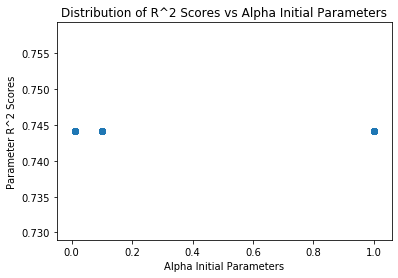

In [13]:
#Create Plot of Match-up Score r^2 Values for the DLC Characters vs Alpha Init Values

#Show a Wide View of All Data Points
plt.scatter(tuning_df['Alpha_Init_Params'], tuning_df['R^2_Score'])
plt.xlabel('Alpha Initial Parameters')
plt.ylabel('Parameter R^2 Scores')
plt.title('Distribution of R^2 Scores vs Alpha Initial Parameters')
plt.show()

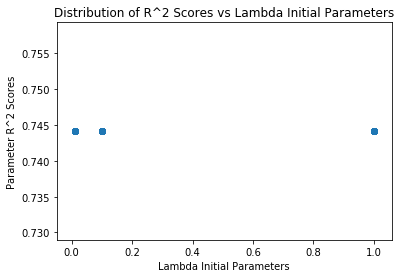

In [14]:
#Show a Wide View of All Data Points
plt.scatter(tuning_df['Lambda_Init_Params'], tuning_df['R^2_Score'])
plt.xlabel('Lambda Initial Parameters')
plt.ylabel('Parameter R^2 Scores')
plt.title('Distribution of R^2 Scores vs Lambda Initial Parameters')
plt.show()

In [15]:
#Re-import the Bayesian Ridge Model & Implement Parameter Values Associated with the Maximum R^2 Value, where the Difference
#Between the R^2 ^ R^2 Adjusted Values was <0.10
from sklearn.linear_model import BayesianRidge

bayes_ridge_model = BayesianRidge(alpha_init=max_rows['Alpha_Init_Params'][0], lambda_init=max_rows['Lambda_Init_Params'][0], alpha_1=max_rows['Alpha_1_Params'][0], alpha_2=max_rows['Alpha_2_Params'][0], lambda_1=max_rows['Lambda_1_Params'][0], lambda_2=max_rows['Lambda_2_Params'][0])

#Train the Model
bayes_ridge_model.fit(X_train, y_train)

#Test the Model to Create Predictions
y_predict = bayes_ridge_model.predict(X_test)

#Test the Model Accuracy
r2_score = bayes_ridge_model.score(X_test, y_test)

#Test the Model for Overfitting
#Found the Formula at https://stackoverflow.com/questions/51038820/how-to-calculated-the-adjusted-r2-value-using-scikit
r2_adj_score = (1 - (1 - r2_score) * (1940 - 1) / (1940 - 6))

In [16]:
#Create a Test/Prediction DataFrame
prediction_df = pd.DataFrame({'Age': X_test['age'], 'Sex':X_test['sex_encoded'], 'BMI':X_test['bmi'], 'Children':X_test['children'], 'Smoker':X_test['smoker_encoded'], 'Region':X_test['region_encoded'], 'Actual_Charges': y_test, 'Predicted_Charges': y_predict})
prediction_df = prediction_df.reset_index(drop=True)
prediction_df['Index'] = prediction_df.index
prediction_df

,Age,Sex,BMI,Children,Smoker,Region,Actual_Charges,Predicted_Charges,Index
0,49,0,29.925,0,0,1,8988.15875,10269.762000,0
1,62,1,26.695,0,1,0,28101.33305,36590.657272,1
2,57,0,20.100,1,0,3,12032.32600,9045.053595,2
3,22,1,39.500,0,0,3,1682.59700,5601.673008,3
4,18,0,38.665,2,0,0,3393.35635,6405.511420,4
...,...,...,...,...,...,...,...,...,...
827,39,1,28.300,1,1,3,21082.16000,30632.681035,827
828,40,0,23.370,3,0,0,8252.28430,7759.647849,828
829,49,1,29.830,1,0,0,9288.02670,11066.510018,829
830,48,1,37.290,2,0,2,8978.18510,12981.707588,830


In [17]:
from sklearn import feature_selection
from sklearn.preprocessing import FunctionTransformer as transformer

In [18]:
#Print the Correlation Coefficients
print(f"The coefficients are: {bayes_ridge_model.coef_}")
print(f"The list of features and their corresponding coefficients are: {list(zip(X_test.columns, bayes_ridge_model.coef_))}")
bayes_ridge_coef_df = pd.DataFrame({'Features':X_test.columns, 'Coefficients':bayes_ridge_model.coef_})
bayes_ridge_coef_df

The coefficients are: [  257.968568     -32.72901171   315.97472297   511.66132059
 23672.79794697  -347.83330813]
The list of features and their corresponding coefficients are: [('age', 257.9685680045508), ('sex_encoded', -32.729011707626924), ('bmi', 315.97472296963224), ('children', 511.6613205869345), ('smoker_encoded', 23672.79794697156), ('region_encoded', -347.83330813235585)]


,Features,Coefficients
0,age,257.968568
1,sex_encoded,-32.729012
2,bmi,315.974723
3,children,511.661321
4,smoker_encoded,23672.797947
5,region_encoded,-347.833308


In [19]:
#Check the Descriptive Statistics to See What Features Make the Best Predictors
import scipy.stats as stats

#ANOVA_results = stats.kruskal(test_linear_df_X1.dropna(axis=0), test_linear_df_Y1['Life expectancy '].dropna(axis=0))
ANOVA_results = feature_selection.f_regression(X_test.dropna(axis=0), y_test.dropna(axis=0))
#print(f"The selected features are: {selected_features.columns.values}")
#print(f"The F-values are: {ANOVA_results[0]}")
#print(f"The p-values are: {ANOVA_results[1]}")
F_regression_df = pd.DataFrame({'Selected_Features': X_train.columns.values, 'F-values': ANOVA_results[0], 'p-values': ANOVA_results[1]})
#F_regression_df = pd.DataFrame({'Selected_Features': transformer(feature_names_out = 'one-to-one').get_features_names_out(), 'F-values': ANOVA_results[0], 'p-values': ANOVA_results[1]})
#F_regression_df.sort_values('F-values', ascending=False)
F_regression_df1 = pd.merge(F_regression_df, bayes_ridge_coef_df, how = 'left', left_on = 'Selected_Features', right_on = 'Features')
F_regression_df2 = F_regression_df1.drop(columns='Features', axis = 1)
F_regression_df3 = F_regression_df2.dropna(subset=['F-values', 'p-values'])
F_regression_df4 = F_regression_df3.loc[F_regression_df3['p-values'] <= 0.05]
F_regression_df4.sort_values('Coefficients', ascending=False)

,Selected_Features,F-values,p-values,Coefficients
4,smoker_encoded,1339.840843,2.220614e-175,23672.797947
2,bmi,44.622718,4.375005e-11,315.974723
0,age,92.055264,9.578824e-21,257.968568
1,sex_encoded,4.242364,3.973857e-02,-32.729012


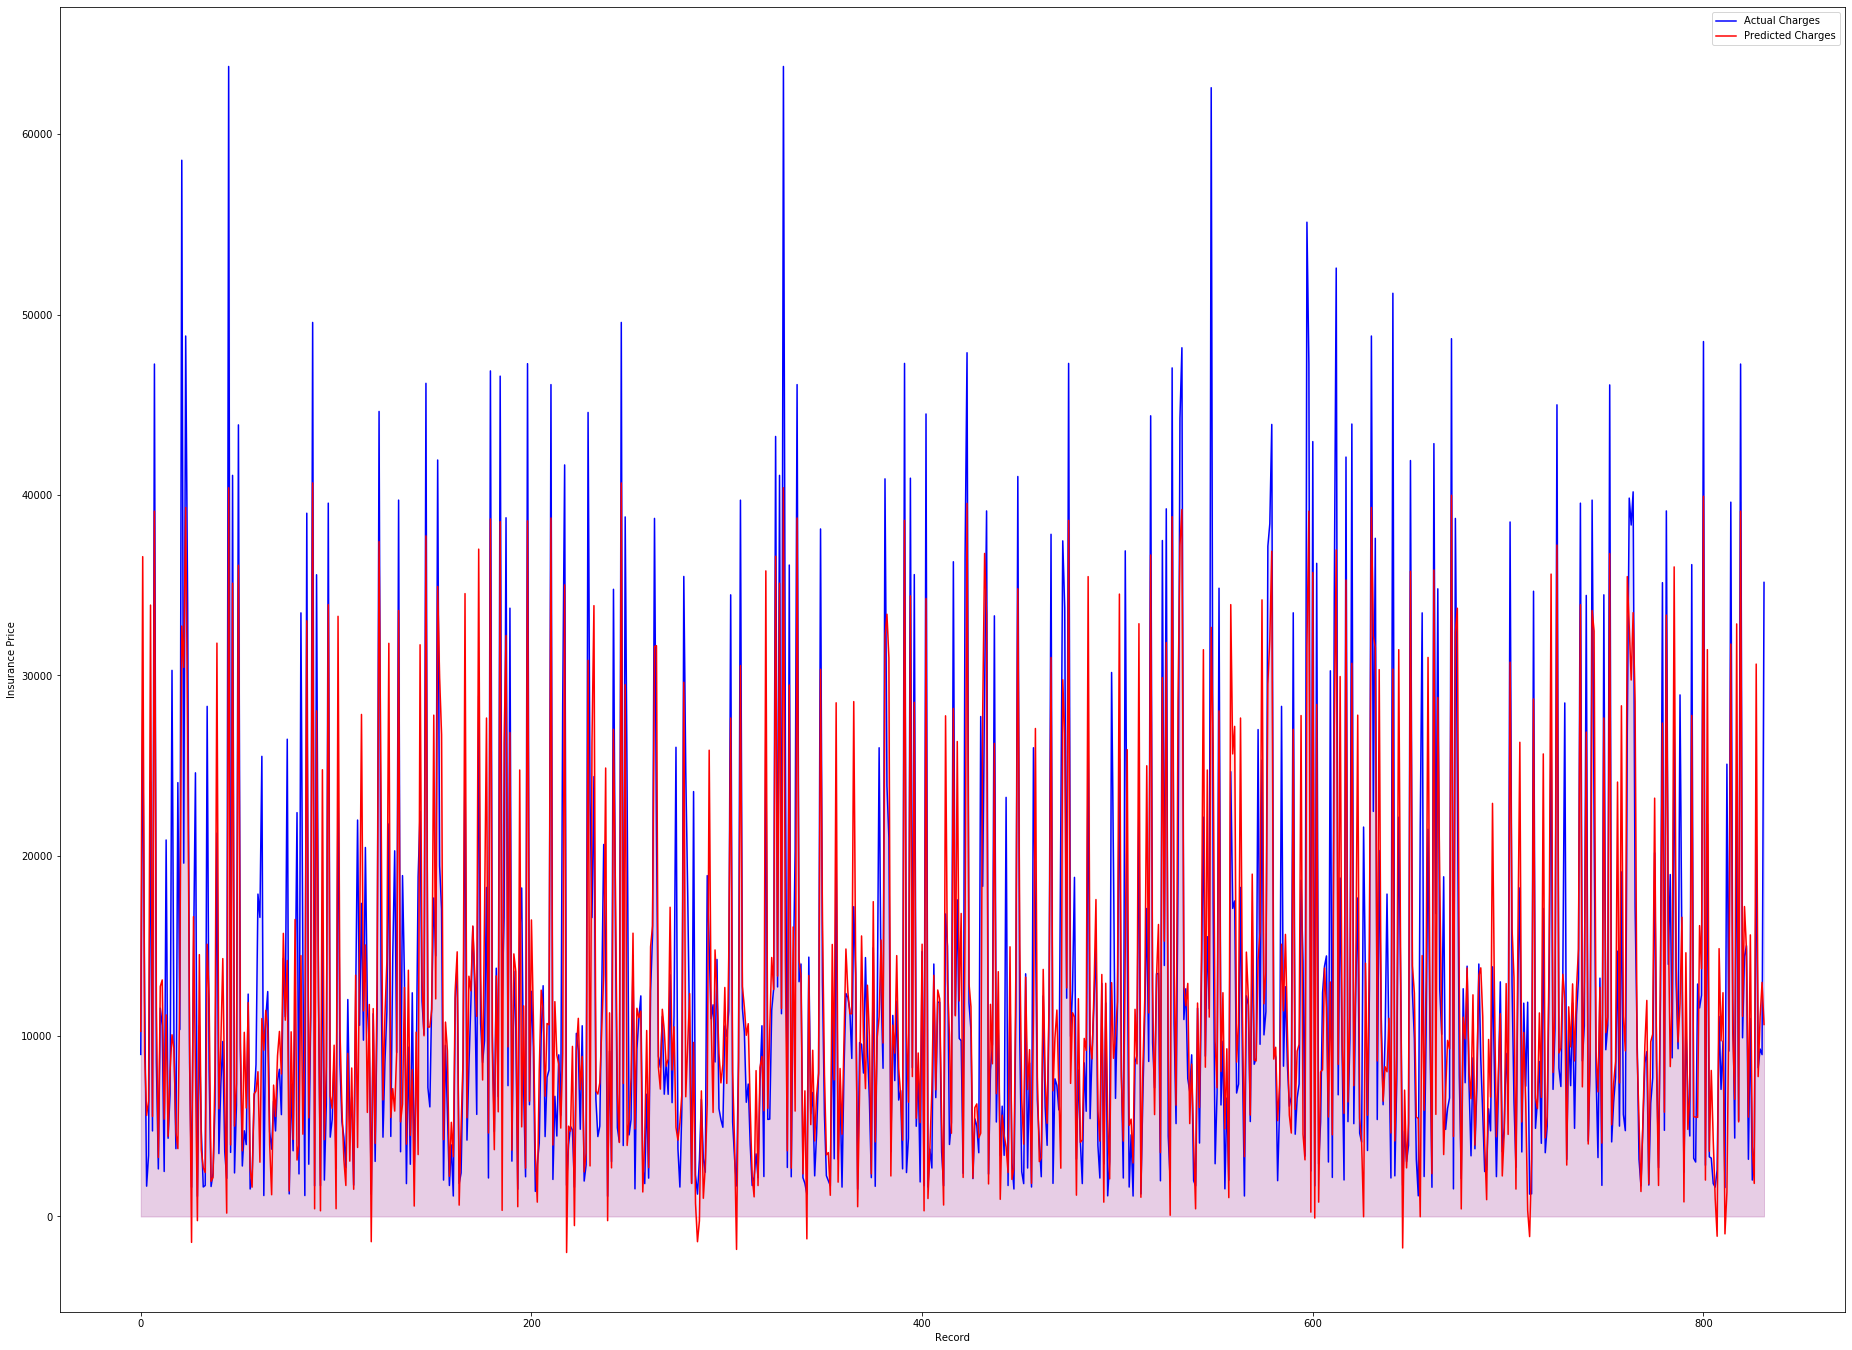

In [20]:
#Graph the Differences Between Actual & Predicted Charges

fig, ax = plt.subplots()
ax.plot(prediction_df['Index'], prediction_df['Actual_Charges'], color='blue', alpha=1.00, label='Actual Charges')
ax.fill_between(prediction_df['Index'], prediction_df['Actual_Charges'], 0, color='blue', alpha=.1)

ax.plot(prediction_df['Index'], prediction_df['Predicted_Charges'], color='red', alpha=1.00, label='Predicted Charges')
ax.fill_between(prediction_df['Index'], prediction_df['Predicted_Charges'], 0, color='red', alpha=.1)
ax.legend()

plt.xlabel('Record')
plt.ylabel('Insurance Price')
plt.rcParams.update({'font.size': 32})
plt.gcf().set_size_inches(32, 24)

plt.show()